In [1]:
import numpy as np
from mcmc.mcmc import StructureMCMC
from mcmc.data import SyntheticDataset
from mcmc.proposals import GraphProposal
from mcmc.scores import BGeScore

# for reproducibility
np.random.seed(46)

In [2]:
# setup synthetic data

num_nodes = 4
node_labels = [chr(ord('a') + i) for i in range(num_nodes)]
num_obs = 200
degree = 2

synthetic_data = SyntheticDataset(num_nodes=num_nodes, num_obs=num_obs, node_labels=node_labels, degree=degree)

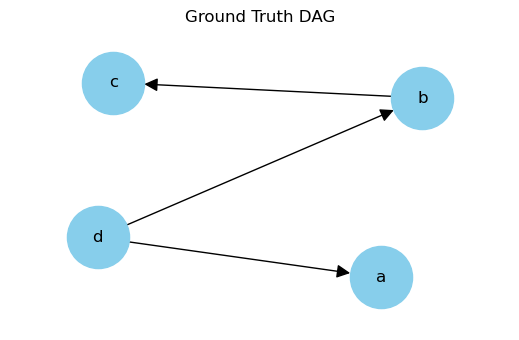

In [3]:
# visualise ground truth DAG
from mcmc.utils.graph_utils import plot_graph_from_adj_mat
plot_graph_from_adj_mat(synthetic_data.adj_mat.values, node_labels, title="Ground Truth DAG")

In [4]:
synthetic_data.data

,a,b,c,d
0,1.785810,1.553824,-3.065396,0.326933
1,-0.337973,-1.186768,3.487224,-1.366003
2,-0.074412,0.790932,-3.531457,0.020731
3,0.404786,-0.219920,0.906302,0.051192
4,3.120747,1.703365,-3.664541,0.871745
...,...,...,...,...
195,1.370768,2.591434,-6.910765,1.445687
196,1.255792,0.678012,-0.653843,0.151428
197,1.778486,1.264475,-2.334946,0.873522
198,1.427316,0.358815,-1.433641,0.697849


In [6]:
# setup mcmc

n_iterations = 100000
M = StructureMCMC(data=synthetic_data.data, max_iter=n_iterations)

Running PC algorithm


In [7]:
# run experiment

mcmc_results, acceptance = M.run()
graphs = M.get_mcmc_res_graphs(mcmc_results)
print('Acceptance_ratio:', acceptance)

Acceptance_ratio: 0.2736


In [8]:
from mcmc.utils.graph_utils import generate_key_from_adj_matrix

graphs = M.get_mcmc_res_graphs(mcmc_results)

key = generate_key_from_adj_matrix(synthetic_data.adj_mat.values)
keys, counts = np.unique([generate_key_from_adj_matrix(g) for g in graphs], return_counts=True)
print(key in keys)

True


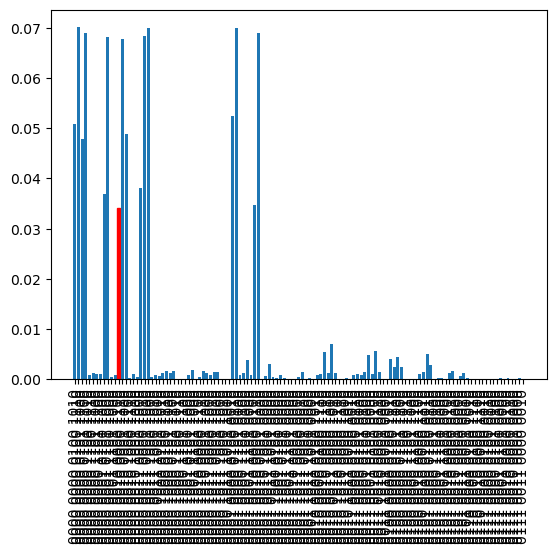

In [9]:
from matplotlib import pyplot as plt

bars = plt.bar(range(len(keys)), counts/len(graphs))
plt.xticks(range(len(keys)), keys, rotation=90);
bars[np.where(keys==key)[0][0]].set_color('red')